In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/govdata/govdata_15min_all.csv', index_col=[0,1], parse_dates=True)

In [3]:
df.sort_index(inplace=True)
df

pm25   pm10   latitude  \
location                  timestamp_round                                
Anand Vihar, Delhi - DPCC 2018-02-28 18:30:00  163.0  525.0  28.646835   
                          2018-02-28 18:45:00  163.0  525.0  28.646835   
                          2018-02-28 19:00:00  163.0  525.0  28.646835   
                          2018-02-28 19:15:00  163.0  525.0  28.646835   
                          2018-02-28 19:30:00  172.0  703.0  28.646835   
                          2018-02-28 19:45:00  172.0  703.0  28.646835   
                          2018-02-28 20:00:00  172.0  703.0  28.646835   
                          2018-02-28 20:15:00  172.0  703.0  28.646835   
                          2018-02-28 20:30:00  154.0  746.0  28.646835   
                          2018-02-28 20:45:00  154.0  746.0  28.646835   
                          2018-02-28 21:00:00  154.0  746.0  28.646835   
                          2018-02-28 21:15:00  154.0  746.0  28.646835   
                          2018-02-28 21:30:00  188.0  685.0  28.646835   
                          2018-02-28 21:45:00  188.0  685.0  28.646835   
                          2018-02-28 22:00:00  188.0  685.0  28.646835   
                          2018-02-28 22:15:00  188.0  685.0  28.646835   
                          2018-02-28 22:30:00  153.0  516.0  28.646835   
                          2018-02-28 22:45:00  153.0  516.0  28.646835   
                          2018-02-28 23:00:00  153.0  516.0  28.646835   
                          2018-02-28 23:15:00  153.0  516.0  28.646835   
                          2018-02-28 23:30:00  195.0  707.0  28.646835   
                          2018-02-28 23:45:00  195.0  707.0  28.646835   
                          2018-03-01 00:00:00  195.0  707.0  28.646835   
                          2018-03-01 00:15:00  195.0  707.0  28.646835   
                          2018-03-01 00:30:00  181.0  606.0  28.646835   
                          2018-03-01 00:45:00  181.0  606.0  28.646835   
                          2018-03-01 01:00:00  181.0  606.0  28.646835   
                          2018-03-01 01:15:00  181.0  606.0  28.646835   
                          2018-03-01 01:30:00  174.0  550.0  28.646835   
                          2018-03-01 01:45:00  174.0  550.0  28.646835   
...                                              ...    ...        ...   
Wazirpur, Delhi - DPCC    2018-10-31 11:00:00  162.0  323.0  28.699793   
                          2018-10-31 11:15:00  162.0  323.0  28.699793   
                          2018-10-31 11:30:00  162.0  323.0  28.699793   
                          2018-10-31 11:45:00  162.0  323.0  28.699793   
                          2018-10-31 12:00:00  183.0  409.0  28.699793   
                          2018-10-31 12:15:00  183.0  409.0  28.699793   
                          2018-10-31 12:30:00  183.0  409.0  28.699793   
                          2018-10-31 12:45:00  183.0  409.0  28.699793   
                          2018-10-31 13:00:00  217.0  520.0  28.699793   
                          2018-10-31 13:15:00  217.0  520.0  28.699793   
                          2018-10-31 13:30:00  217.0  520.0  28.699793   
                          2018-10-31 13:45:00  217.0  520.0  28.699793   
                          2018-10-31 14:00:00  340.0  807.0  28.699793   
                          2018-10-31 14:15:00  340.0  807.0  28.699793   
                          2018-10-31 14:30:00  340.0  807.0  28.699793   
                          2018-10-31 14:45:00  340.0  807.0  28.699793   
                          2018-10-31 15:00:00  517.0  940.0  28.699793   
                          2018-10-31 15:15:00  517.0  940.0  28.699793   
                          2018-10-31 15:30:00  517.0  940.0  28.699793   
                          2018-10-31 15:45:00  517.0  940.0  28.699793   
                          2018-10-31 16:00:00  407.0  704.0  28.699793   
                          2018-10-31 16:15:00  407.0

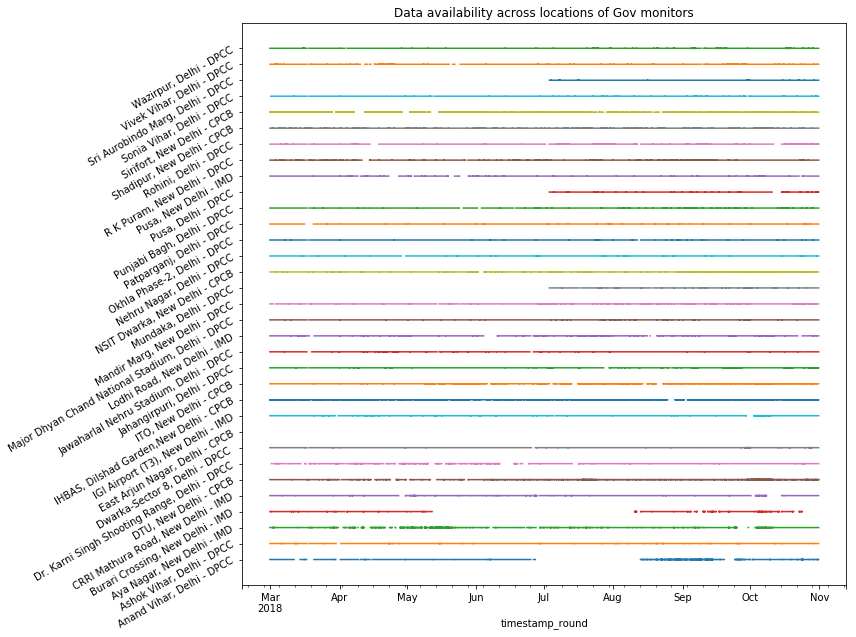

In [5]:
grouped = df.groupby(level=0)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

for count, (name, group) in enumerate(grouped, 1):
    # plot the data availability
    group.reset_index(level=0, drop=False, inplace=True)
    group.pm25.where(np.isnan(group.pm25), other=count).plot()

ax.set_yticks(np.arange(1,count+1))
ax.set_yticklabels([name for (name,group) in grouped], rotation=30)
ax.set_title('Data availability across locations of Gov monitors')
plt.tight_layout()
fig.savefig('data/datagaps_pm25_govdata.png')
fig.savefig('data/datagaps_pm25_govdata.pdf')

In [13]:
plt.close('all')